<a href="https://colab.research.google.com/github/Muhammadsodiq0011/Muhammadsodiq0011/blob/main/Airticket_price%20/%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
#standard libraries
import pandas as pd
import numpy as np

#visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid") 

#scikit-learn 
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# xgboost

from xgboost import XGBRegressor

In [108]:
df = pd.read_csv('/content/train_data.csv')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [109]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [113]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [114]:
df['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6d97d263d0>,
 [Text(0.29652475684067275, 1.2657302511122108, 'Vistara'),
  Text(-1.020125018439193, -0.4115154271159664, 'SpiceJet'),
  Text(0.1268886600664002, -1.0926569763409528, 'Indigo'),
  Text(0.7980704485021185, -0.7570228260941857, 'Air_India'),
  Text(1.0309298997034182, -0.38364507281796284, 'GO_FIRST'),
  Text(1.095020120993552, -0.1045511100814679, 'AirAsia')])

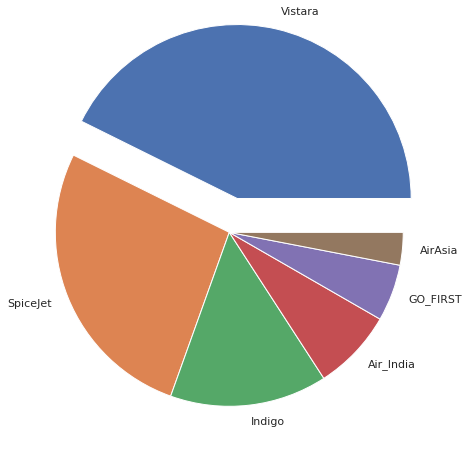

In [131]:
#visualization 
comps = list(df['airline'].unique())
vals = list(df['airline'].value_counts())
exp = [0.2, 0, 0, 0, 0, 0]
plt.figure(figsize=(10, 8))
plt.pie(vals, labels=comps, shadow=False, explode=exp )

In [126]:
df['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [127]:
# model of Airline
df['flight'].apply(lambda x: x[:2]).value_counts()

UK    8535
AI    5371
6E    2924
G8    1508
I5    1056
SG     606
Name: flight, dtype: int64

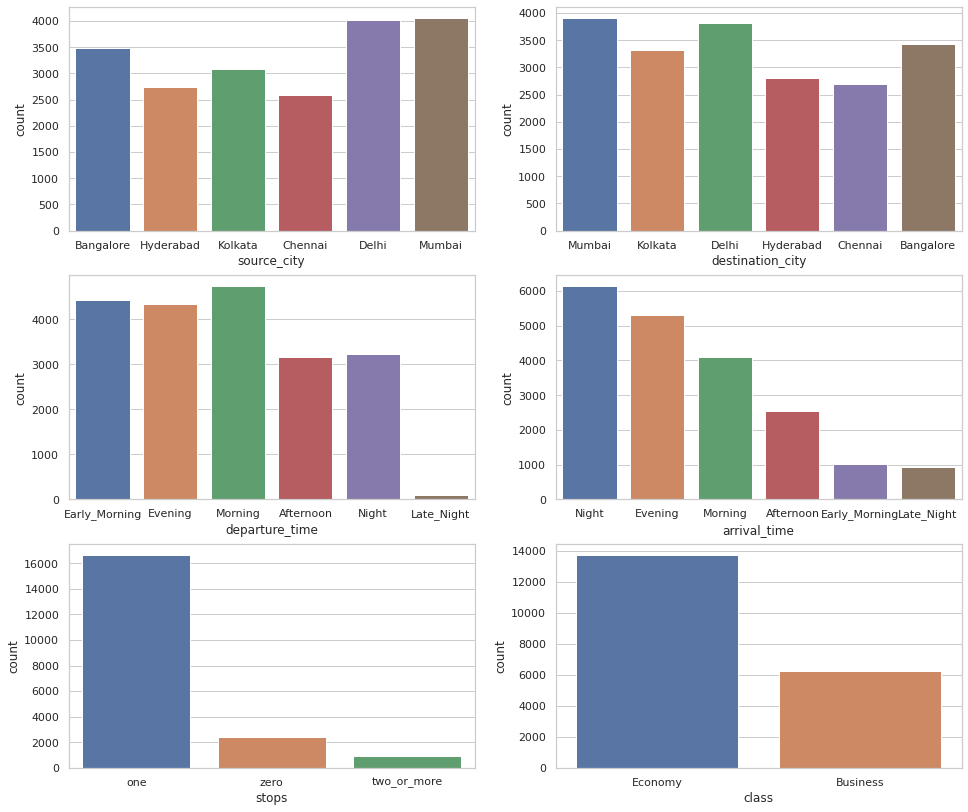

In [132]:
# visualization for remaining text columns
fig, ax = plt.subplots(3, 2, figsize=(16, 14))

sns.countplot(ax=ax[0, 0], data=df, x='source_city')
sns.countplot(ax=ax[0, 1], data=df, x='destination_city')
sns.countplot(ax=ax[1, 0], data=df, x='departure_time')
sns.countplot(ax=ax[1, 1], data=df, x='arrival_time')
sns.countplot(ax=ax[2, 0], data=df, x='stops')
sns.countplot(ax=ax[2, 1], data=df, x='class');

In [133]:
# I pass the dataset by checking the source_city and destination_city columns
# ie 'Mumbai' => 'Delhi'(true) | 'Mumbai' => 'Mumbai'(false)
for i in range(len(df)):
    if df['source_city'][i] == df['destination_city'][i]:
        print('Xatolik bor!')

In [135]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [136]:
df.drop(['id','flight'], axis=1, inplace=True)


Machine Learning via StratifiedShuffleSplit


In [137]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=15)
for tr_idx, te_idx in strat_split.split(df, df['class']):
    st_trainset = df.loc[tr_idx]
    st_testset = df.loc[te_idx]

In [138]:
st_trainset.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
13071,Air_India,Bangalore,Evening,one,Morning,Kolkata,Business,15.17,30,60508
7277,AirAsia,Bangalore,Afternoon,two_or_more,Night,Kolkata,Economy,10.33,21,3393
9487,Indigo,Bangalore,Afternoon,one,Evening,Delhi,Economy,6.83,30,4284
14074,Air_India,Mumbai,Evening,one,Evening,Bangalore,Business,22.25,22,54608
9805,AirAsia,Delhi,Early_Morning,one,Night,Chennai,Economy,14.83,44,3918


In [139]:
st_testset.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
15730,Air_India,Hyderabad,Early_Morning,one,Afternoon,Kolkata,Economy,29.67,41,6312
18961,AirAsia,Delhi,Early_Morning,one,Evening,Bangalore,Economy,12.00,33,3090
13096,Indigo,Mumbai,Afternoon,one,Evening,Bangalore,Economy,6.83,35,4056
12418,Vistara,Delhi,Afternoon,one,Night,Mumbai,Business,9.08,32,51384
7161,Air_India,Mumbai,Night,one,Morning,Kolkata,Economy,11.50,3,12768


In [140]:
X_train = st_trainset.drop('price', axis=1)
y = st_trainset['price'].copy()

X_num = X_train[['duration', 'days_left']]

In [ ]:
# NUM PIPELINE
num_pipeline = Pipeline([
            ('std_scaler', StandardScaler())
])

In [142]:
# FULL PIPELINE

num_attribs = list(X_num)
cat_attribs = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [143]:
X_prepared = full_pipeline.fit_transform(X_train)


In [144]:
LR_model = LinearRegression()

LR_model.fit(X_prepared, y)
X_test = st_testset.drop('price', axis=1)
y_test = st_testset['price'].copy()
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 4466.0
RMSE= 6597.0


DecisionTree Regressor


In [145]:
DT_model = DecisionTreeRegressor()

DT_model.fit(X_prepared, y)
y_predicted = DT_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 2154.0
RMSE= 4905.0


RandomForest Regressor


In [146]:
RF_model = RandomForestRegressor()

RF_model.fit(X_prepared, y)
y_predicted = RF_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 1922.0
RMSE= 3730.0


XGBoost Regressor

In [147]:
XGB_model = XGBRegressor()

XGB_model.fit(X_prepared, y)
y_predicted = XGB_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

[13:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE= 2922.0
RMSE= 4883.0


Submission

In [149]:
df2 = pd.read_csv("/content/test_data.csv")
df2

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [150]:
for i in range(len(df2)):
    if df2['source_city'][i] == df2['destination_city'][i]:
        print('Xatolik bor!')

In [151]:
df2.drop(['id', 'flight'], axis=1, inplace=True)
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [152]:
df2.describe()

,duration,days_left
count,5000.000000,5000.000000
mean,12.328838,26.015600
std,7.306348,13.692409
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.250000,38.000000
max,40.670000,49.000000


In [153]:
forsub = full_pipeline.transform(df2)

# For Submission I chose RandomForest Regressor
sub_predicted = RF_model.predict(forsub)
sub_predicted

array([52286.76, 57125.12, 23349.88, ..., 50271.68, 48280.5 , 65972.84])

In [154]:
len(sub_predicted)


5000

In [155]:
ss = pd.read_csv("/content/sample_solution.csv")
ss.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [156]:
ss['price'] = sub_predicted

ss.to_csv("submission.csv", index=False)

In [157]:
pd.read_csv("./submission.csv")


,id,price
0,1,52286.76
1,2,57125.12
2,3,23349.88
3,4,2543.66
4,5,5724.02
...,...,...
4995,4996,59688.92
4996,4997,4477.46
4997,4998,50271.68
4998,4999,48280.50
